In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# how to find that the data is normal
* sns.distplot() karke dekh lo
* pd.skew() use karlo agar 0 toh skewed nahi he agar -ve or +ve toh skewed he
* Use QQplot() most relaiable from all
1. agar QQplot line pe pura chipka hua he toh the distribution of data is normal distribution thin tail data me bhi yahi hota he
2. agar nrmal distributed he par center me bahut jayada values he tab QQplot center se line pe rehta he aur end se upar niche hojata he fat tail data me bhi yahi jota eh 
3. agar distribution right skewed he toh QQplot dono end se upar uth jaega
4. agar distribution left skewed he toh QQplot dono end se niche hojaega 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.Age.describe()

count    712.000000
mean      29.538225
std       12.994548
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [10]:
tf1 = SimpleImputer()

In [11]:
tf1.fit_transform(X_train)

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    ,  14.1083],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]])

In [12]:
Column_age_filled = ColumnTransformer(transformers=[
    ('tf1',tf1,[0])
],remainder='passthrough')

In [13]:
Column_age_filled.fit_transform(X_train)

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    ,  14.1083],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]])

In [14]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


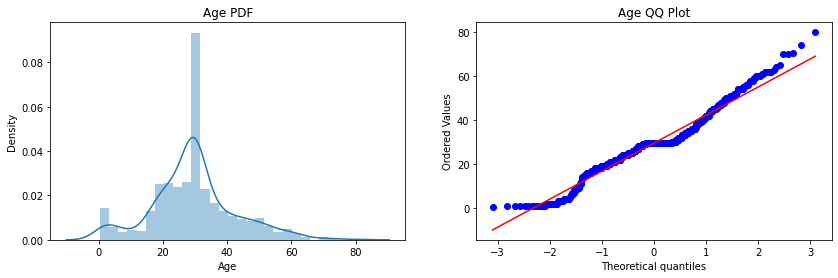

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()